<a href="https://www.kaggle.com/code/hamdigamalabdalwasea/nobel-to-2016?scriptVersionId=147642358" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import plotly.graph_objects as go
import plotly.express as px
import seaborn as sns
import matplotlib.pyplot as plt
from matplotlib.ticker import PercentFormatter

In [2]:
df=pd.read_csv("/kaggle/input/nobeell/nobel.csv")

In [3]:
df.head()

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,birth_country,sex,organization_name,organization_city,organization_country,death_date,death_city,death_country
0,1901,Chemistry,The Nobel Prize in Chemistry 1901,"""in recognition of the extraordinary services ...",1/1,160,Individual,Jacobus Henricus van 't Hoff,1852-08-30,Rotterdam,Netherlands,Male,Berlin University,Berlin,Germany,1911-03-01,Berlin,Germany
1,1901,Literature,The Nobel Prize in Literature 1901,"""in special recognition of his poetic composit...",1/1,569,Individual,Sully Prudhomme,1839-03-16,Paris,France,Male,NaN,NaN,NaN,1907-09-07,Châtenay,France
2,1901,Medicine,The Nobel Prize in Physiology or Medicine 1901,"""for his work on serum therapy, especially its...",1/1,293,Individual,Emil Adolf von Behring,1854-03-15,Hansdorf (Lawice),Prussia (Poland),Male,Marburg University,Marburg,Germany,1917-03-31,Marburg,Germany
3,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,462,Individual,Jean Henry Dunant,1828-05-08,Geneva,Switzerland,Male,NaN,NaN,NaN,1910-10-30,Heiden,Switzerland
4,1901,Peace,The Nobel Peace Prize 1901,NaN,1/2,463,Individual,Frédéric Passy,1822-05-20,Paris,France,Male,NaN,NaN,NaN,1912-06-12,Paris,France


In [4]:
df.shape

(911, 18)

In [5]:
df.prize_share.value_counts()

prize_share
1/1    344
1/2    306
1/3    201
1/4     60
Name: count, dtype: int64

In [6]:
x=(344/1)+(306/2)+(201/3)+(60/4)
x

579.0

In [7]:
fig =go.Figure()
fig.add_trace(go.Indicator(mode="number",value=int(df.shape[0]),title={"text":"number of laureates won Nobel prizes"},
                          domain={"row":0,"column":0}))
fig.add_trace(go.Indicator(mode="number",value=int(x),title={"text":"number Nobel prizes handed"},
                          domain={"row":1,"column":0}))
fig.update_layout(grid={"rows":2,"columns":1,"pattern":"independent"})


In [8]:
con_df=df.birth_country.value_counts()[:10].reset_index()
con_df.columns=["birth_country","count"]
fig= px.bar(con_df,x="birth_country",y="count",text="count",title="Top 10 countries")
fig.show()

In [9]:
df['usa_born_winner'] = df['birth_country']=="United States of America"
df['decade'] = (np.floor(df['year']/10)*10).astype(int)
usa = df.groupby('decade',as_index=False)['usa_born_winner'].mean()
display(usa)

,decade,usa_born_winner
0,1900,0.017544
1,1910,0.075000
2,1920,0.074074
3,1930,0.250000
4,1940,0.302326
5,1950,0.291667
6,1960,0.265823
7,1970,0.317308
8,1980,0.319588
9,1990,0.403846


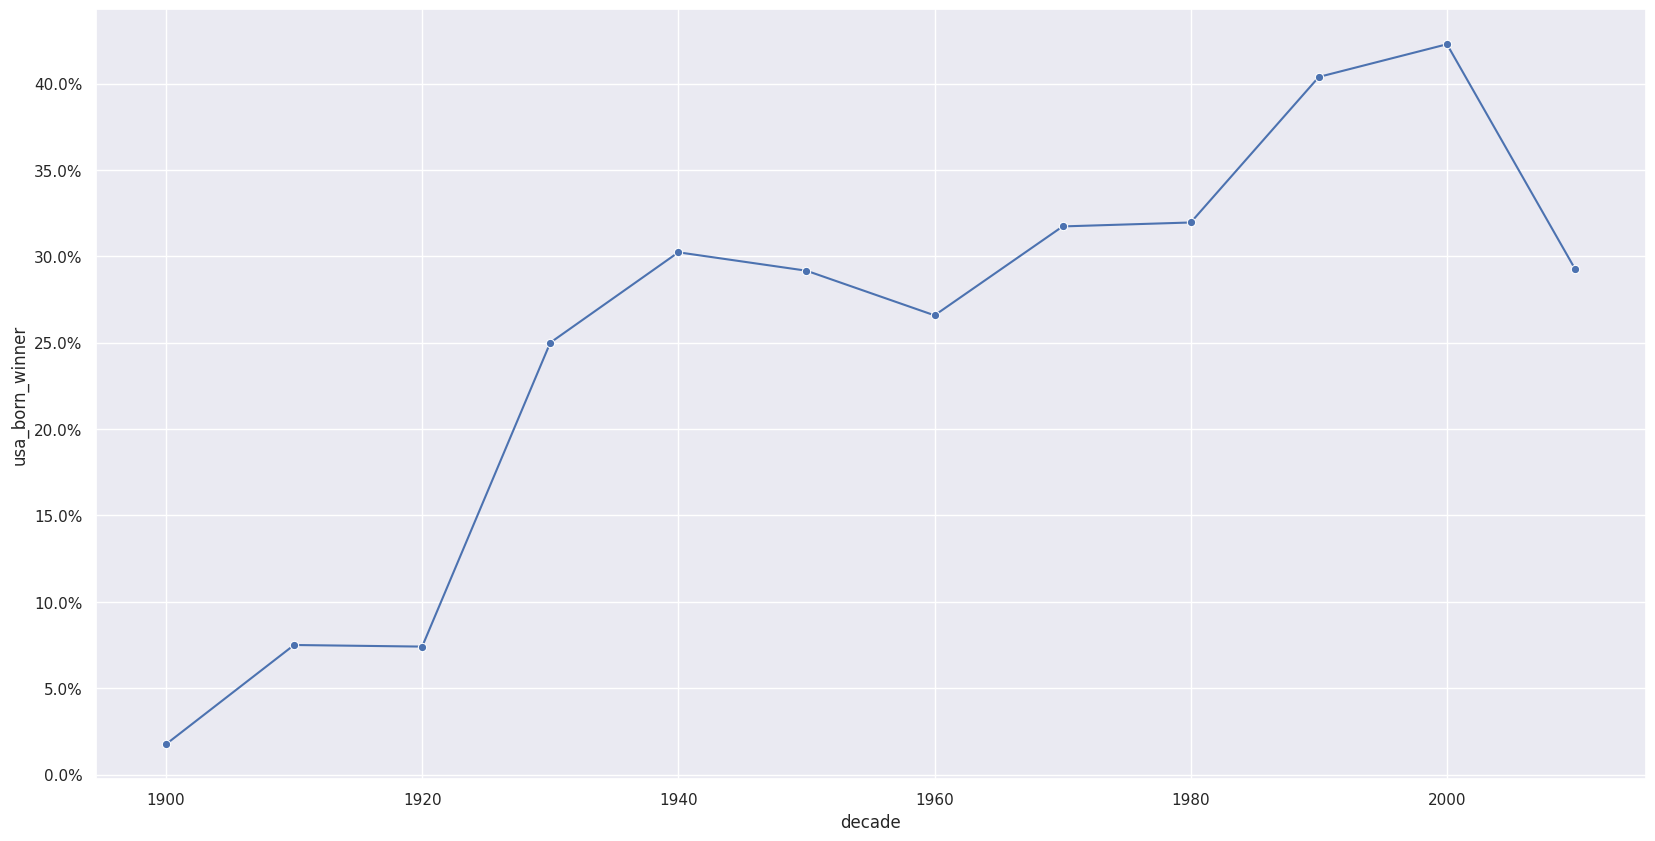

In [10]:
sns.set_theme()
fig_dims=(20,10)
fig,ax=plt.subplots(figsize=fig_dims)
sns.lineplot(data=usa,x="decade",y="usa_born_winner",marker="o")
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
fig.show()

In [11]:
pie_df=df.sex.value_counts().reset_index()
pie_df.columns=['sex','count']
fig=px.pie(pie_df,values="count",names="sex",title="proportion of genders",color_discrete_sequence=['#002080','#ff0066'])
fig.show()

In [12]:
df['female'] = df['sex']=="Female"
fem_winner = df.groupby(['decade'],as_index=False)['female'].mean()
display(fem_winner)

,decade,female
0,1900,0.052632
1,1910,0.025000
2,1920,0.037037
3,1930,0.053571
4,1940,0.069767
5,1950,0.000000
6,1960,0.037975
7,1970,0.038462
8,1980,0.041237
9,1990,0.067308


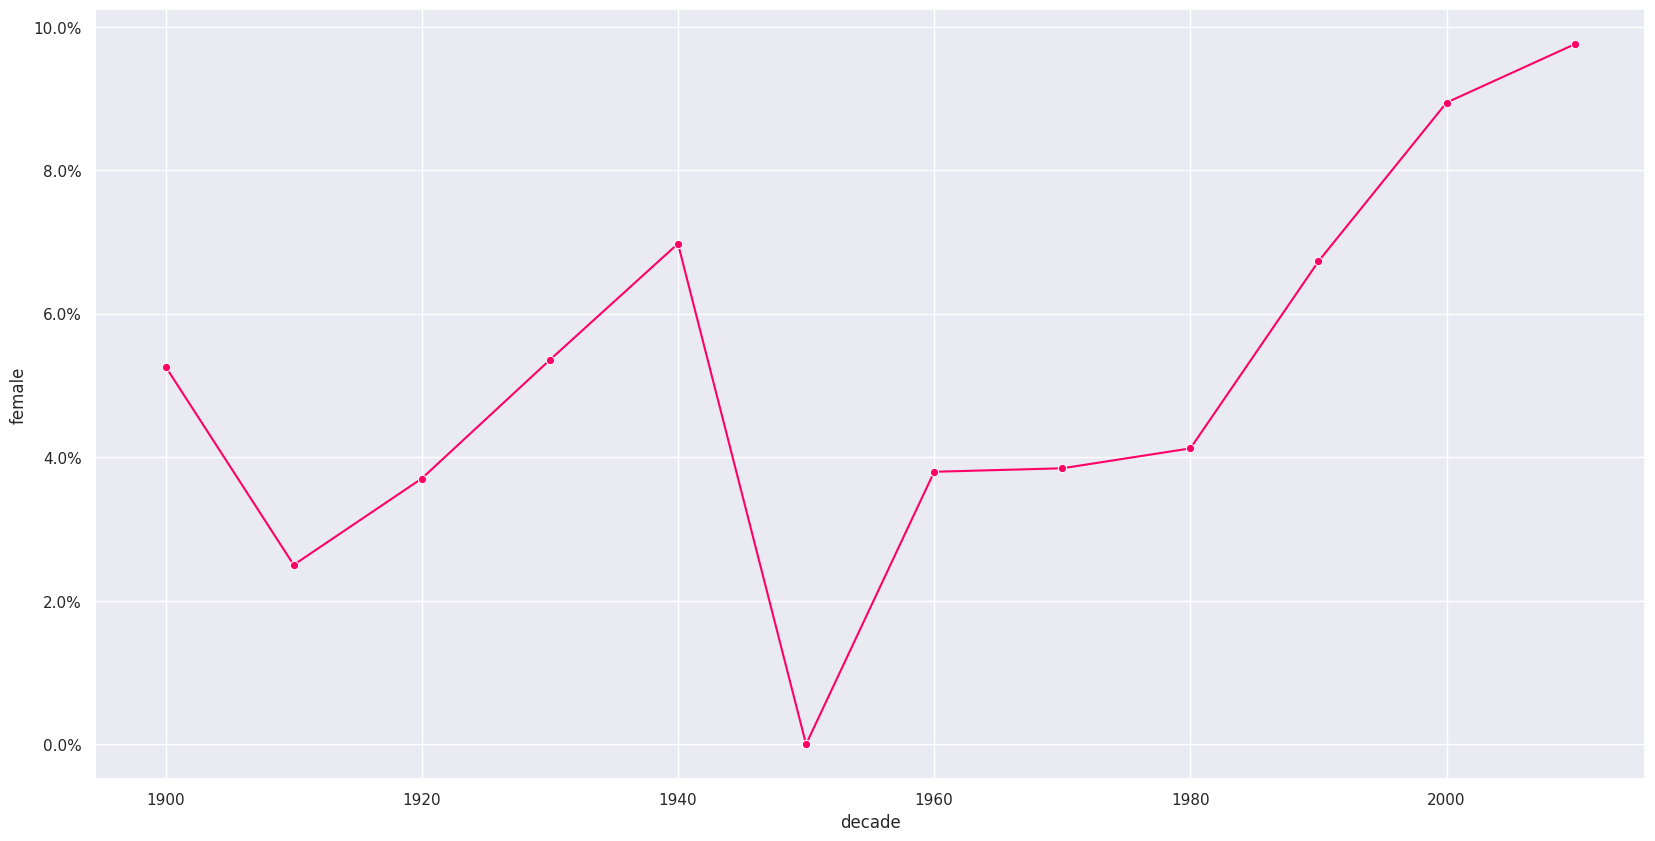

In [13]:
sns.set_theme()
fig_dims = (20,10)
fig,ax = plt.subplots(figsize=fig_dims)
sns.lineplot(data=fem_winner, x='decade',y='female',marker="o",color='#ff0066') 
ax.yaxis.set_major_formatter(PercentFormatter(1.0))
fig.show()

In [14]:
fem_df = df[df['female']].category.value_counts().reset_index()
fem_df.columns = ['category','count']
fig = px.bar(fem_df,x='category',y='count',
             color_discrete_sequence=['#ff0055'],text="count")
fig.show()

In [15]:
f=df[df['female']].nsmallest(1,'year')
display(f[['full_name','category','prize','year']])

,full_name,category,prize,year
19,"Marie Curie, née Sklodowska",Physics,The Nobel Prize in Physics 1903,1903


In [16]:
repeat=df.groupby(['full_name']).filter(lambda group:len(group)>1)
display(repeat[['full_name','category','prize','year']])

,full_name,category,prize,year
19,"Marie Curie, née Sklodowska",Physics,The Nobel Prize in Physics 1903,1903
62,"Marie Curie, née Sklodowska",Chemistry,The Nobel Prize in Chemistry 1911,1911
89,Comité international de la Croix Rouge (Intern...,Peace,The Nobel Peace Prize 1917,1917
215,Comité international de la Croix Rouge (Intern...,Peace,The Nobel Peace Prize 1944,1944
278,Linus Carl Pauling,Chemistry,The Nobel Prize in Chemistry 1954,1954
283,Office of the United Nations High Commissioner...,Peace,The Nobel Peace Prize 1954,1954
298,John Bardeen,Physics,The Nobel Prize in Physics 1956,1956
306,Frederick Sanger,Chemistry,The Nobel Prize in Chemistry 1958,1958
340,Linus Carl Pauling,Peace,The Nobel Peace Prize 1962,1962
348,Comité international de la Croix Rouge (Intern...,Peace,The Nobel Peace Prize 1963,1963


In [17]:
reg_df = repeat.full_name.value_counts().reset_index()
reg_df.columns = ['full_name','count']
fig = px.bar(reg_df,y='full_name',x='count',title='The laureates that have received 2 or more prizes',
             color_discrete_sequence=['#316394'],text="count")
fig.show()

In [18]:
df['birth_date'] = pd.to_datetime(df['birth_date'])
df['age'] = df['year'] - df['birth_date'].dt.year
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 911 entries, 0 to 910
Data columns (total 22 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   year                  911 non-null    int64         
 1   category              911 non-null    object        
 2   prize                 911 non-null    object        
 3   motivation            823 non-null    object        
 4   prize_share           911 non-null    object        
 5   laureate_id           911 non-null    int64         
 6   laureate_type         911 non-null    object        
 7   full_name             911 non-null    object        
 8   birth_date            883 non-null    datetime64[ns]
 9   birth_city            883 non-null    object        
 10  birth_country         885 non-null    object        
 11  sex                   885 non-null    object        
 12  organization_name     665 non-null    object        
 13  organization_city   

In [19]:
def GetGrade(age):
    if   ( age<=14 ):
        return "Child"
    elif (age<=25):
        return "Youth"
    elif (age<=64):
        return "Adult"
    else:
        return "Senior"
    

df['age_group'] = df.apply(lambda x : GetGrade(x['age']), axis=1)

df.age_group.value_counts()

age_group
Adult     580
Senior    329
Youth       2
Name: count, dtype: int64

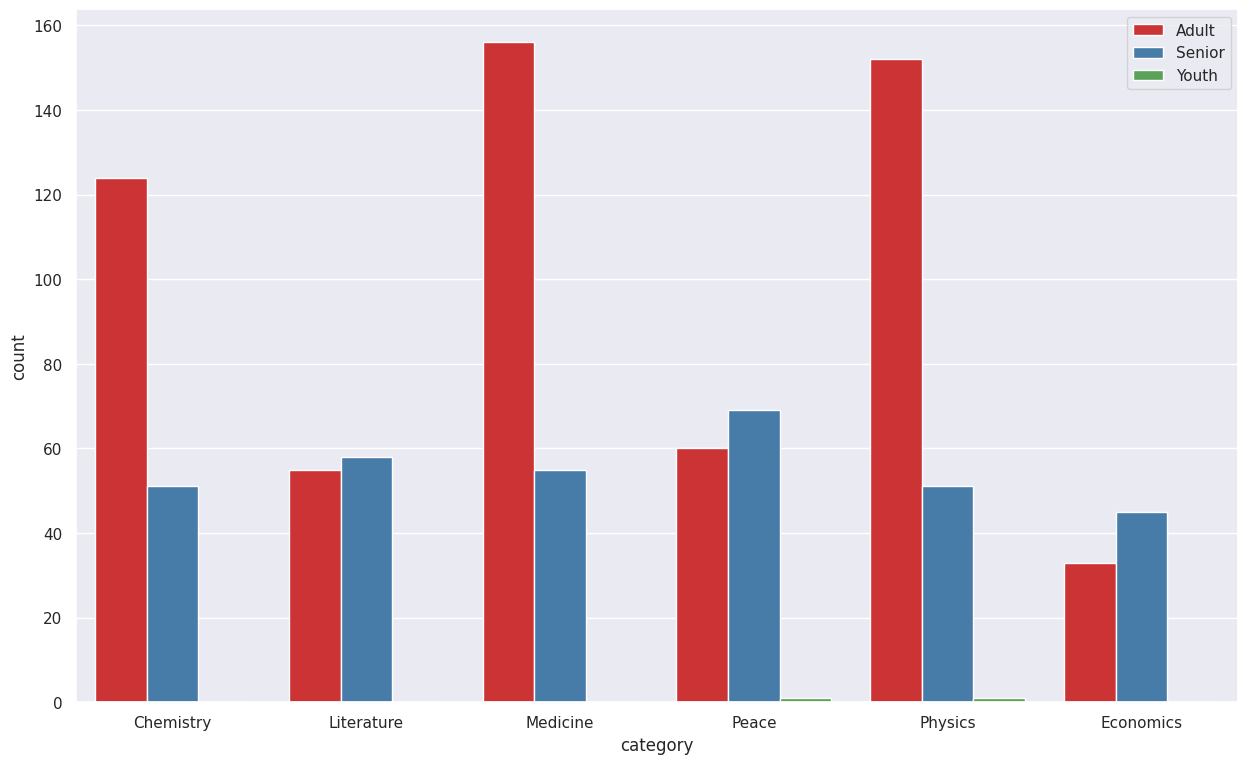

In [20]:
plt.figure(figsize=(15,9))
ax = sns.countplot(hue='age_group',x='category',data=df,palette="Set1")
ax.legend(loc='upper right',frameon=True)

In [21]:
display(df.nlargest(1, 'age'))
df.nsmallest(1, 'age')

,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
793,2007,Economics,The Sveriges Riksbank Prize in Economic Scienc...,"""for having laid the foundations of mechanism ...",1/3,820,Individual,Leonid Hurwicz,1917-08-21,Moscow,...,"Minneapolis, MN",United States of America,2008-06-24,"Minneapolis, MN",United States of America,False,2000,False,90.0,Senior


,year,category,prize,motivation,prize_share,laureate_id,laureate_type,full_name,birth_date,birth_city,...,organization_city,organization_country,death_date,death_city,death_country,usa_born_winner,decade,female,age,age_group
885,2014,Peace,The Nobel Peace Prize 2014,"""for their struggle against the suppression of...",1/2,914,Individual,Malala Yousafzai,1997-07-12,Mingora,...,NaN,NaN,NaN,NaN,NaN,False,2010,True,17.0,Youth
